In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data  = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [9]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
import os

In [13]:
import glob

In [14]:
path = r'./Sales_Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_months = pd.concat(li, axis=0)

In [24]:
all_months.to_csv("all_data.csv", index=False)

In [25]:
salesdata = pd.read_csv("all_data.csv")

In [26]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
#step1 : Cleaning

In [27]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [28]:
salesdata.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [30]:
salesdata.dropna(how = 'all',inplace=True)

In [31]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [32]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [40]:
salesdata = salesdata.loc[salesdata['Order Date'] != 'Order Date', :]

In [44]:
salesdata['Order Date'] = pd.to_datetime(salesdata['Order Date'])

F:\Ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
salesdata['Month'] = salesdata['Order Date'].dt.month_name()

In [50]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [51]:
salesdata.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
dtype: object

In [ ]:
#still cleaning

In [52]:
salesdata['Quantity Ordered'] = pd.to_numeric(salesdata['Quantity Ordered'])
salesdata['Price Each'] = pd.to_numeric(salesdata['Price Each'])

In [53]:
salesdata.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
dtype: object

### 1. What was the best month for sales and what was the sale amount

In [54]:
salesdata['Sales'] = salesdata['Quantity Ordered'] * salesdata['Price Each']

In [56]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


In [60]:
salesdata.Sales.dtype

dtype('float64')

In [66]:
salesdata.groupby(salesdata['Month']).sum()['Sales'].sort_values(ascending  = False)

Month
December     4.613443e+06
October      3.736727e+06
April        3.390670e+06
November     3.199603e+06
May          3.152607e+06
March        2.807100e+06
July         2.647776e+06
June         2.577802e+06
August       2.244468e+06
February     2.202022e+06
September    2.097560e+06
January      1.822257e+06
Name: Sales, dtype: float64

In [ ]:
#while taking months as in df, remember to sort it month wise in the Sales_Data folder itself : TIP

In [ ]:
#or when making a new month column make it as numeric so it gets sorted auto and then rename as month name in visualization

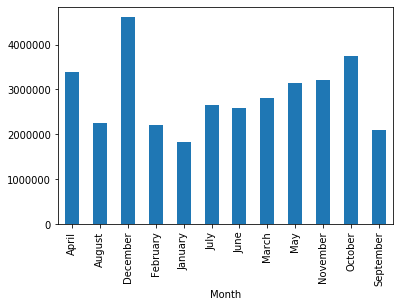

In [91]:
salesdata.groupby(salesdata['Month']).sum()['Sales'].plot(kind = 'bar')

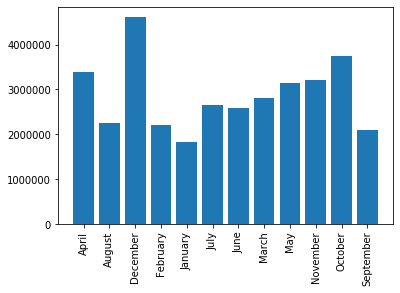

In [125]:
months = [m for m,df in salesdata.groupby('Month')]
plt.bar(months,salesdata.groupby(salesdata['Month']).sum()['Sales'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Best Month of sale  = December

In [90]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


### 2. Getting the cities with the highest sales

In [110]:
def cities(obj):
    c = obj.split(",")[1]
    return c

def state(obj):
    s= obj.split(",")[2].split(" ")[1]
    return s

In [111]:
salesdata['City'] = salesdata['Purchase Address'].apply(lambda x : cities(x) + ' ' + state(x))

In [112]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA


In [113]:
salesdata.City.value_counts()

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: City, dtype: int64

In [115]:
citysale = salesdata.groupby('City').sum()['Sales']

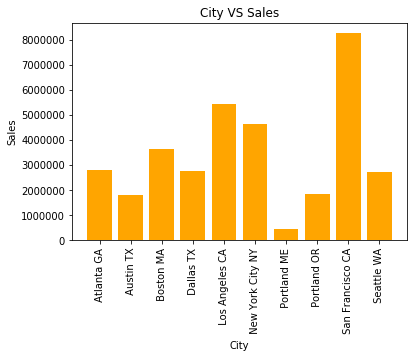

In [129]:
cit = [city for city,df in salesdata.groupby('City')]              #step very important to match the values with the group by function
plt.bar(cit,citysale,color='orange')
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City VS Sales")
plt.show()

### 3. Which time had the best Sales

In [130]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA


In [134]:
salesdata['Time'] = salesdata['Order Date'].dt.hour

In [135]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,9


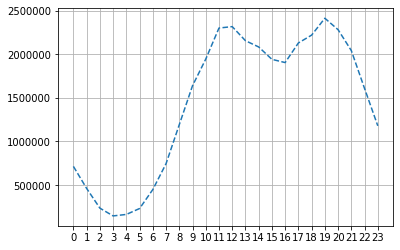

In [146]:
#summing the sales
hours = [h for h,df in salesdata.groupby('Time')]
plt.plot(hours, salesdata.groupby('Time').sum()['Sales'],'--')
plt.grid()
plt.xticks(hours)
plt.show()

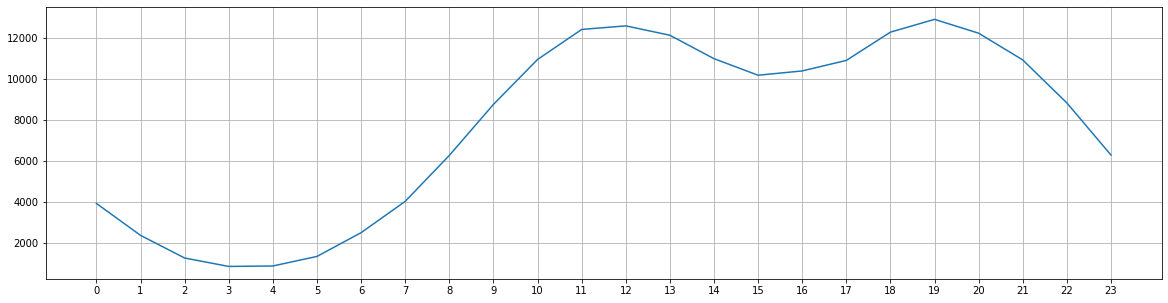

<Figure size 720x360 with 0 Axes>

In [145]:
#counting the number of sales 
hours = [h for h,df in salesdata.groupby('Time')]
plt.figure(figsize=(20,5))
plt.plot(hours, salesdata.groupby('Time').count()['Sales'])
plt.grid()
plt.xticks(hours)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
#Best time for sales is at 19:00 hours and 11:00 hours

### 4. Items sold together frequently

In [169]:
together = salesdata.copy()

In [170]:
together = together[together['Order ID'].duplicated(keep = False)]

In [171]:
together = together[['Order ID', 'Product']]

In [ ]:
#joining two products

In [172]:
together['Joined'] = together.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
#apply cannot be used

In [173]:
together = together.drop_duplicates()

In [178]:
together = together.drop_duplicates(subset=['Order ID'])

In [182]:
together = together.drop(columns=['Product'])

In [183]:
together.head()

,Order ID,Joined
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [186]:
#This is for the most common sold together in pairs of 2
from itertools import combinations
from collections import Counter

count = Counter()

for c in together['Joined']:
    c_diff = c.split(',')
    count.update(Counter(combinations(c_diff, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [187]:
#This is for the most common sold together in pairs of 3
from itertools import combinations
from collections import Counter

count = Counter()

for c in together['Joined']:
    c_diff = c.split(',')
    count.update(Counter(combinations(c_diff, 3)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [188]:
#tried this, though it gives the correct pair of 2 sold, the quantity is  slightly off
together.Joined.value_counts()

iPhone,Lightning Charging Cable                           882
Google Phone,USB-C Charging Cable                         856
iPhone,Wired Headphones                                   361
Vareebadd Phone,USB-C Charging Cable                      312
Google Phone,Wired Headphones                             303
                                                         ... 
20in Monitor,iPhone                                         1
LG Washing Machine,Google Phone                             1
LG Dryer,Google Phone                                       1
AAA Batteries (4-pack),LG Dryer                             1
Google Phone,USB-C Charging Cable,USB-C Charging Cable      1
Name: Joined, Length: 366, dtype: int64

In [ ]:
#Therefore  ('iPhone', 'Lightning Charging Cable') were most commonly sold

### 5. Which product sold the most

In [189]:
salesdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,9


In [190]:
salesdata.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [194]:
#considering quantity ordered
salesdata.groupby('Product').sum()['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

Text(0.5, 1.0, 'Products most sold')

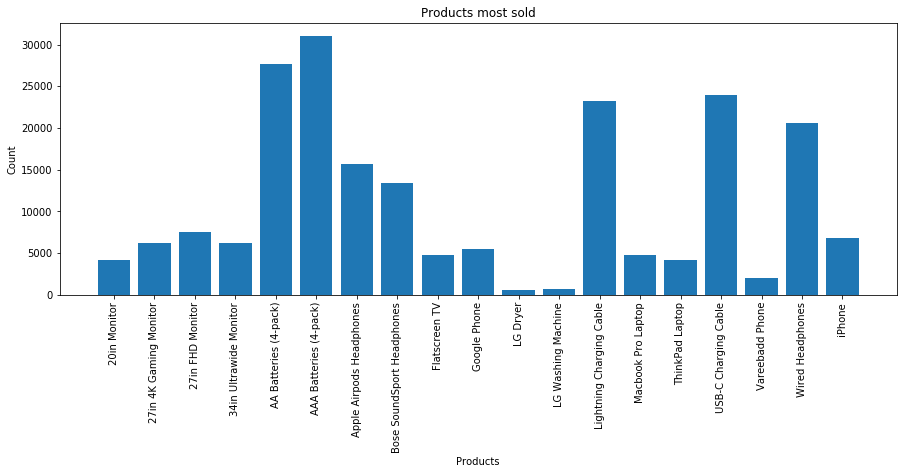

In [212]:
pro = [p for p,df in salesdata.groupby('Product')]
plt.figure(figsize=(15,5))
plt.bar(pro, salesdata.groupby('Product').sum()['Quantity Ordered'])
plt.xticks(rotation = 90, size = 10)
plt.xlabel("Products")
plt.ylabel("Count")
plt.title("Products most sold")

In [ ]:
#AAA Batteries are the most sold

### 6. Items sold and the price of each, showing the variation

In [199]:
salesdata.groupby('Product').mean()['Price Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<Figure size 1440x360 with 0 Axes>

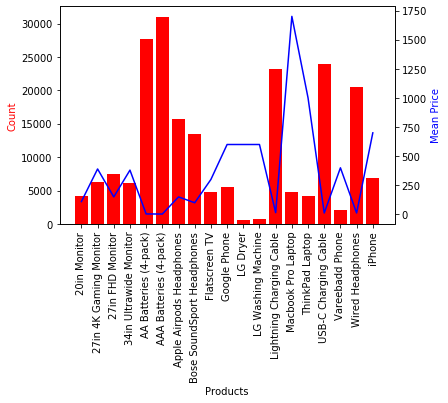

In [211]:
#stackoverflow:  https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(pro, salesdata.groupby('Product').sum()['Quantity Ordered'], color='Red')
ax2.plot(pro, salesdata.groupby('Product').mean()['Price Each'], 'b-')
ax1.set_xticklabels(pro,rotation = 90)
ax1.set_xlabel('Products')
ax1.set_ylabel('Count', color='r')
ax2.set_ylabel('Mean Price', color='b')

plt.show()

In [ ]:
#Cheaper products sold more and expensive items like maccbook had better sales.